Write your names below:

<font color='red'> You just need to read and execute all the cells below. </red>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plan

1. Get the data
2. Data preparation
3. Modeling

****

# <font color='magenta'> Get the data </font>

Read the raw data from a csv file.

In [3]:
ufo_df = pd.read_csv ('./ufo_sightings.csv', header=None,low_memory=False)
ufo_df.shape

(80332, 11)

In [4]:
ufo_df.columns = ['datetime_sighted', 'city', 'state', 'country', 'ushape', 'duration_seconds', 'duration_text', 'description_text', 'date_recorded', 'lat', 'long']

In [5]:
ufo_df.head()

,datetime_sighted,city,state,country,ushape,duration_seconds,duration_text,description_text,date_recorded,lat,long
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [6]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime_sighted    80332 non-null object
city                80332 non-null object
state               74535 non-null object
country             70662 non-null object
ushape              78400 non-null object
duration_seconds    80332 non-null object
duration_text       80332 non-null object
description_text    80317 non-null object
date_recorded       80332 non-null object
lat                 80332 non-null object
long                80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


*****

# <font color='magenta'> Data Preparation </font>

**Interface**
- Input: all the data in a data frame `ufo_df`
- Output: cleaned and transformed training data (`X_train`, `y_train`); cleaned and transformed test data (`X_test`, `y_test`)


**Detailed pipeline**
1. Split data into 2 disjoint sets: <font color='red'>training set </font> (in `ufo_df_train`) and  <font color='red'>test set</font> (in `ufo_df_test`).
1. Data cleaning of <font color='red'>training set</font>
2. Feature engineering of  <font color='red'>training set</font>
3. Automated feature selection of  <font color='red'>training set</font>
4. Put final result in `X_train`, `y_train`
5. Apply same data preparation pipeline on  <font color='red'>test set</font> and put final result in `X_test`, `y_test`

## Split data into training and test sets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# read documentation of the train_test_split function
#?train_test_split

#### Replace missing values in `country`

This is necessary because the `train_test_split` throws an error when the *stratify* variable contains missing values.


In [9]:
ufo_df.country.unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [10]:
ufo_df.country.isnull().sum()

9670

In [11]:
## replace missing values in the country variable as 'unknown'
# this is necessary because train_test_split gives an error when stratify variable contains missing values
ufo_df.loc[ufo_df.country.isnull(),'country'] = 'unknown'
ufo_df.country.unique()

array(['us', 'unknown', 'gb', 'ca', 'au', 'de'], dtype=object)

#### Divide data using `country` as the *stratify* variable

In [12]:
ufo_df_train,ufo_df_test = train_test_split(ufo_df, test_size=0.3, random_state=2019, stratify=ufo_df.country)
ufo_df_train.shape, ufo_df_test.shape

((56232, 11), (24100, 11))

In [13]:
ufo_df_train.country.value_counts(normalize=True)

us         0.810553
unknown    0.120376
ca         0.037345
gb         0.023705
au         0.006704
de         0.001316
Name: country, dtype: float64

In [14]:
ufo_df_test.country.value_counts(normalize=True)

us         0.810581
unknown    0.120373
ca         0.037344
gb         0.023734
au         0.006680
de         0.001286
Name: country, dtype: float64

******

## Data cleaning

### Manual feature selection

Below you will remove attributes that are redundant/duplicate or useless for building the model for predicting *country* from other non-location variables.

Remember that manual feature selection is done **based only** on descriptions of the variables and understanding of the probem. No programming is required.

In [15]:
ufo_df_sub = ufo_df_train.copy()
ufo_df_sub.shape

(56232, 11)

In [16]:
ufo_df_sub = ufo_df_sub.drop(columns=['city', 'state', 'lat', 'long'], axis=1)
ufo_df_sub.shape

(56232, 7)

In [17]:
ufo_df_sub.columns

Index(['datetime_sighted', 'country', 'ushape', 'duration_seconds',
       'duration_text', 'description_text', 'date_recorded'],
      dtype='object')

In [18]:
ufo_df_sub = ufo_df_sub.drop(columns=['date_recorded', 'duration_text'], axis=1)
ufo_df_sub.shape 

(56232, 5)

In [19]:
ufo_df_sub.head()

,datetime_sighted,country,ushape,duration_seconds,description_text
50032,6/18/2013 23:00,us,circle,300,Orange/red silent object with very bright flas...
27810,2/2/1999 06:43,us,other,1,I saw a very bright green ball fall from the s...
6425,10/5/1994 19:00,us,circle,2700,Large object with flashing seen from 3 directi...
36703,4/14/2011 03:08,us,light,15,Object chased by military jets
28134,2/22/2014 19:00,us,fireball,120,Hovering fireball in Dothan&#44 AL.


### Data type conversions

The dtype of all columns is `object`, which means they are encoded as text. Therefore some type conversions are necessary.

In [20]:
ufo_df_sub.dtypes

datetime_sighted    object
country             object
ushape              object
duration_seconds    object
description_text    object
dtype: object

In [21]:
# change type of duration_seconds to continuous (float)
ufo_df_sub['duration_seconds'] = pd.to_numeric(ufo_df_sub.duration_seconds, errors='coerce')

## ANOTHER METHOD:
## ufo_df_sub['duration_seconds'] = ufo_df_sub.duration_seconds.astype(float)

In [22]:
# change type of datetime_sighted to DATETIME class
ufo_df_sub["datetime_sighted"] = pd.to_datetime(ufo_df_sub.datetime_sighted, errors='coerce')

In [23]:
#Verify your results
ufo_df_sub.dtypes

datetime_sighted    datetime64[ns]
country                     object
ushape                      object
duration_seconds           float64
description_text            object
dtype: object

### Drop missing data

Let's remove some of the rows where certain columns have missing values. We're going to look at the length_of_time column, the state column, and the type column. If any of the values in these columns are missing, we're going to drop the rows.

In [24]:
# number of missing values in each column of data frame

ufo_df_sub.isnull().sum()

datetime_sighted     485
country                0
ushape              1339
duration_seconds       3
description_text      10
dtype: int64

In [25]:
print("data frame size BEFORE removing missing values", ufo_df_sub.shape)
ufo_df_sub.dropna(how='any', inplace=True)
print("data frame size AFTER removing missing values", ufo_df_sub.shape)

data frame size BEFORE removing missing values (56232, 5)
data frame size AFTER removing missing values (54430, 5)


In [26]:
ufo_df_sub.isnull().sum()

datetime_sighted    0
country             0
ushape              0
duration_seconds    0
description_text    0
dtype: int64

****

## Feature engineering

### Feature engineering of numeric columns

In this section, you'll investigate the useful numeric variables in this dataset and determine whether they should be scaled and/or log-normalized.

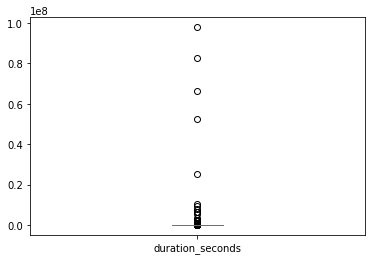

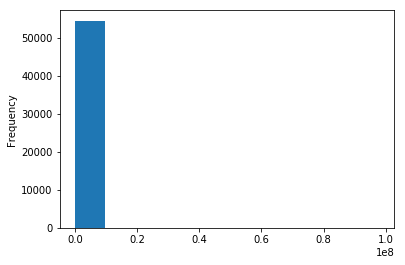

In [27]:
# Plot distribution of duration_seconds variable
fig1=ufo_df_sub.duration_seconds.plot.box()
plt.show()
fig2=ufo_df_sub.duration_seconds.plot.hist()

In [28]:
ufo_df_sub.duration_seconds.describe()

count    5.443000e+04
mean     8.935185e+03
std      6.743895e+05
min      1.000000e-03
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      9.783600e+07
Name: duration_seconds, dtype: float64

In [29]:
# Log normalization

ufo_df_sub['duration_seconds_lg'] = np.log(ufo_df_sub.duration_seconds)
ufo_df_sub[['duration_seconds','duration_seconds_lg']].head()

,duration_seconds,duration_seconds_lg
50032,300.0,5.703782
27810,1.0,0.000000
6425,2700.0,7.901007
36703,15.0,2.708050
28134,120.0,4.787492


In [30]:
# Standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [31]:
ufo_df_sub['duration_seconds_lg_scaled'] = sc.fit_transform(ufo_df_sub[['duration_seconds_lg']]).ravel()
ufo_df_sub[['duration_seconds_lg','duration_seconds_lg_scaled']].head()

,duration_seconds_lg,duration_seconds_lg_scaled
50032,5.703782,0.347794
27810,0.000000,-2.271106
6425,7.901007,1.356653
36703,2.708050,-1.027701
28134,4.787492,-0.072922


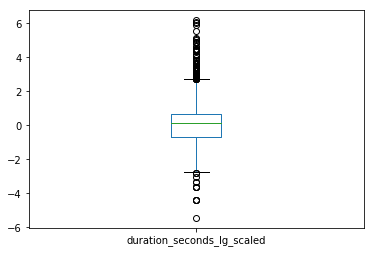

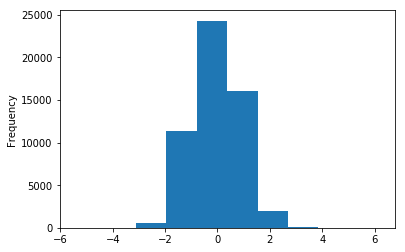

In [32]:
# Plot the distribution of the NEW column

fig1=ufo_df_sub.duration_seconds_lg_scaled.plot.box()
plt.show()
fig2=ufo_df_sub.duration_seconds_lg_scaled.plot.hist()

### Feature engineering of categorical variables

- `country` variable: Combine all countries except the US into a single category called `non-us`.
- `ushape` variable: Combine all categories that occur less than 300 times into a new category called `RARE`.

#### `country` variable

In [33]:
# number of categories in this variable
ufo_df_sub.country.nunique()

6

In [34]:
# distribution of values (frequency of each category)
ufo_df_sub.country.value_counts()

us         44191
unknown     6481
ca          2050
gb          1272
au           364
de            72
Name: country, dtype: int64

In [35]:
idx = ufo_df_sub.country=='us'
ufo_df_sub.loc[~idx,'country'] = 'non-us'
ufo_df_sub.country.value_counts()

us        44191
non-us    10239
Name: country, dtype: int64

#### `ushape` variable

In [36]:
# number of categories in this variable
ufo_df_sub.ushape.nunique()

28

In [37]:
# distribution of values (frequency of each category)
ufo_df_sub.ushape.value_counts()

light        11619
triangle      5481
circle        5285
fireball      4284
unknown       3853
other         3847
sphere        3715
disk          3587
oval          2600
formation     1700
cigar         1406
changing      1354
flash          946
cylinder       915
rectangle      904
diamond        817
chevron        691
egg            536
teardrop       520
cone           210
cross          150
delta            3
round            2
crescent         1
pyramid          1
changed          1
hexagon          1
flare            1
Name: ushape, dtype: int64

In [38]:
# Combine all sparse categories (those that occur less than 300 times) of ushape into a single category called RARE.

vc = ufo_df_sub.ushape.value_counts()
ushape_sparse_categories = list(vc[vc<300].index)
ushape_sparse_categories

['cone',
 'cross',
 'delta',
 'round',
 'crescent',
 'pyramid',
 'changed',
 'hexagon',
 'flare']

In [39]:
ufo_df_sub.loc[ufo_df_sub.ushape.isin(ushape_sparse_categories),'ushape'] = 'RARE'

In [40]:
ufo_df_sub.ushape.nunique()

20

In [41]:
ufo_df_sub.ushape.value_counts()

light        11619
triangle      5481
circle        5285
fireball      4284
unknown       3853
other         3847
sphere        3715
disk          3587
oval          2600
formation     1700
cigar         1406
changing      1354
flash          946
cylinder       915
rectangle      904
diamond        817
chevron        691
egg            536
teardrop       520
RARE           370
Name: ushape, dtype: int64

In [42]:
# one-hot encoding of ushape variable

ushape_hot_df = pd.get_dummies(ufo_df_sub['ushape'])
type(ushape_hot_df),ushape_hot_df.shape

(pandas.core.frame.DataFrame, (54430, 20))

In [43]:
ushape_hot_df.shape

(54430, 20)

In [44]:
assert ushape_hot_df.shape[1] == ufo_df_sub.ushape.nunique()

In [45]:
assert ushape_hot_df.shape[0] == ufo_df_sub.shape[0]

### Feature engineering of unstructured columns

#### Time/date columns

Convert the date columns into month and year variables.

We have already removed `date_recorded` as a useless variable.

So we will only do this for the `month_sighted` variable.

In [46]:
ufo_df_sub.isna().sum()

datetime_sighted              0
country                       0
ushape                        0
duration_seconds              0
description_text              0
duration_seconds_lg           0
duration_seconds_lg_scaled    0
dtype: int64

In [47]:
# Extract the month from the date column
ufo_df_sub["month_sighted"] = ufo_df_sub["datetime_sighted"].map(lambda row: row.month)

# Extract the year from the date column
ufo_df_sub["year_sighted"] = ufo_df_sub["datetime_sighted"].map(lambda row: row.year)

# Take a look at the new columns to make sure everything is okay
ufo_df_sub[["datetime_sighted", "month_sighted", "year_sighted"]].head()

,datetime_sighted,month_sighted,year_sighted
50032,2013-06-18 23:00:00,6,2013
27810,1999-02-02 06:43:00,2,1999
6425,1994-10-05 19:00:00,10,1994
36703,2011-04-14 03:08:00,4,2011
28134,2014-02-22 19:00:00,2,2014


#### Text columns
We're going to transform the `description_text` column in the UFO dataset into tf/idf vectors, since there's likely something we can learn from this attribute.

In [48]:
## Let's first take a look at the head of the description field
ufo_df_sub.description_text.head()

50032    Orange/red silent object with very bright flas...
27810    I saw a very bright green ball fall from the s...
6425     Large object with flashing seen from 3 directi...
36703                       Object chased by military jets
28134                  Hovering fireball in Dothan&#44 AL.
Name: description_text, dtype: object

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer class
vec = TfidfVectorizer(max_df=0.8,min_df=10,max_features=50,stop_words='english')

# Transform each description to a vector of numeric attributes using the vec object.
# We hence obtain a nxm matrix , where each column corresponds to a frequent word in the corpus
desc_tfidf_mat = vec.fit_transform(ufo_df_sub.description_text)

# Note that the data type scipy.sparse.csr.csr_matrix is a SPARSE matrix
print(type(desc_tfidf_mat))
print(desc_tfidf_mat.shape)

# Finally we convert result to a data frame because this is more convenient
desc_tfidf_df = pd.DataFrame(desc_tfidf_mat.todense())
print(desc_tfidf_df.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(54430, 50)
(54430, 50)


In [50]:
desc_tfidf_df.columns = ['text_' + word for word in vec.get_feature_names()]
desc_tfidf_df.columns

Index(['text_33', 'text_44', 'text_ball', 'text_blue', 'text_bright',
       'text_craft', 'text_east', 'text_fast', 'text_fireball',
       'text_flashing', 'text_flying', 'text_formation', 'text_glowing',
       'text_green', 'text_high', 'text_hovering', 'text_large', 'text_light',
       'text_lights', 'text_like', 'text_looked', 'text_low', 'text_moved',
       'text_moving', 'text_night', 'text_north', 'text_note', 'text_nuforc',
       'text_object', 'text_objects', 'text_orange', 'text_pd', 'text_quot',
       'text_red', 'text_saw', 'text_seen', 'text_shape', 'text_shaped',
       'text_sighting', 'text_sky', 'text_slowly', 'text_sound', 'text_south',
       'text_speed', 'text_star', 'text_triangle', 'text_triangular',
       'text_ufo', 'text_west', 'text_white'],
      dtype='object')

In [51]:
# The vocabulary words corresponding to each column in desc_tfidf  
vec.get_feature_names()

['33',
 '44',
 'ball',
 'blue',
 'bright',
 'craft',
 'east',
 'fast',
 'fireball',
 'flashing',
 'flying',
 'formation',
 'glowing',
 'green',
 'high',
 'hovering',
 'large',
 'light',
 'lights',
 'like',
 'looked',
 'low',
 'moved',
 'moving',
 'night',
 'north',
 'note',
 'nuforc',
 'object',
 'objects',
 'orange',
 'pd',
 'quot',
 'red',
 'saw',
 'seen',
 'shape',
 'shaped',
 'sighting',
 'sky',
 'slowly',
 'sound',
 'south',
 'speed',
 'star',
 'triangle',
 'triangular',
 'ufo',
 'west',
 'white']

****

#### Summary of old and new attributes after feature selection and engineering

- The selected set of **predictor attributes** are:

      datetime_sighted, ushape, duration_seconds, description_text

- The engineered **predictor attributes** are:

      original variable    how many new variables           new variable names
      ------------------------------------------------------------------------------------------------------------
      datetime_sighted     2 numeric discrete variables     month_sighted, year_sighted (2 new columns in ufo_df_sub)
      ushape               20 numeric binary variables      ushape_hot_df (data frame with 20 columns)
      duration_seconds     1 numeric continuous variable    duration_seconds_lg_scaled (new column in ufo_df_sub)
      description_text     50 numeric variables             desc_tfidf_df (new data frame with 50 columns)

- Thus the final number predictor attributes is: 2 + 20 + 1 + 50 = 73 attributes.

In [52]:
ufo_df_sub.shape, ushape_hot_df.shape, desc_tfidf_df.shape

((54430, 9), (54430, 20), (54430, 50))

In [53]:
ufo_df_sub.columns

Index(['datetime_sighted', 'country', 'ushape', 'duration_seconds',
       'description_text', 'duration_seconds_lg', 'duration_seconds_lg_scaled',
       'month_sighted', 'year_sighted'],
      dtype='object')

In [54]:
ufo_df_sub.columns

Index(['datetime_sighted', 'country', 'ushape', 'duration_seconds',
       'description_text', 'duration_seconds_lg', 'duration_seconds_lg_scaled',
       'month_sighted', 'year_sighted'],
      dtype='object')

In [55]:
desc_tfidf_df.columns

Index(['text_33', 'text_44', 'text_ball', 'text_blue', 'text_bright',
       'text_craft', 'text_east', 'text_fast', 'text_fireball',
       'text_flashing', 'text_flying', 'text_formation', 'text_glowing',
       'text_green', 'text_high', 'text_hovering', 'text_large', 'text_light',
       'text_lights', 'text_like', 'text_looked', 'text_low', 'text_moved',
       'text_moving', 'text_night', 'text_north', 'text_note', 'text_nuforc',
       'text_object', 'text_objects', 'text_orange', 'text_pd', 'text_quot',
       'text_red', 'text_saw', 'text_seen', 'text_shape', 'text_shaped',
       'text_sighting', 'text_sky', 'text_slowly', 'text_sound', 'text_south',
       'text_speed', 'text_star', 'text_triangle', 'text_triangular',
       'text_ufo', 'text_west', 'text_white'],
      dtype='object')

*****

## Combine final results of data preparation process

As mentioned in the summary above, the final results of the data preparation process are contained in 3 different data frames: `ufo_df_sub`, `ushape_hot_df`, `desc_tfidf_df`.

For the sake of the modeling step, we will now combine those results in the following two new variables:
- `X_train` : data frame containing the **final set of predictor attributes** 
- `y_train`: series containing the target attribute (*country*).

In [56]:
#?ufo_df_sub.reset_index

In [57]:
# read documentation of pd.concat function
#?pd.concat

In [58]:
ushape_hot_df.columns

Index(['RARE', 'changing', 'chevron', 'cigar', 'circle', 'cylinder', 'diamond',
       'disk', 'egg', 'fireball', 'flash', 'formation', 'light', 'other',
       'oval', 'rectangle', 'sphere', 'teardrop', 'triangle', 'unknown'],
      dtype='object')

In [59]:
desc_tfidf_df.columns

Index(['text_33', 'text_44', 'text_ball', 'text_blue', 'text_bright',
       'text_craft', 'text_east', 'text_fast', 'text_fireball',
       'text_flashing', 'text_flying', 'text_formation', 'text_glowing',
       'text_green', 'text_high', 'text_hovering', 'text_large', 'text_light',
       'text_lights', 'text_like', 'text_looked', 'text_low', 'text_moved',
       'text_moving', 'text_night', 'text_north', 'text_note', 'text_nuforc',
       'text_object', 'text_objects', 'text_orange', 'text_pd', 'text_quot',
       'text_red', 'text_saw', 'text_seen', 'text_shape', 'text_shaped',
       'text_sighting', 'text_sky', 'text_slowly', 'text_sound', 'text_south',
       'text_speed', 'text_star', 'text_triangle', 'text_triangular',
       'text_ufo', 'text_west', 'text_white'],
      dtype='object')

In [60]:
# reset the index of the data frames before combining them; otherwise will get error!!!
ufo_df_sub.reset_index(drop=True, inplace=True)
ushape_hot_df.reset_index(drop=True, inplace=True)

# combine these 3 data frames into a new data frame using the pd.concat function.
X_train = pd.concat([ufo_df_sub[['duration_seconds_lg_scaled','month_sighted', 'year_sighted']], ushape_hot_df, desc_tfidf_df], axis=1)

# put the target variable in a separate series variable
y_train = ufo_df_sub.country

X_train.shape, y_train.shape

((54430, 73), (54430,))

****

## Apply same data preparation steps on test set

Summary of data preparation pipeline:

1. manual feature selection: keep only `country, ushape, desription, duration_seconds, datetime_sighted`
2. convert data types (`duration_seconds` to float, `datetime_sighted` to datetime class)
3. remove rows that contain any missing values
4. log normalization and standard scaling of `duration_seconds` variable
5. combine sparse categories of `country` and `ushape` variable
6. one-hot encoding of `ushape` variable.
7. create two new attributes from `datetime_sighted` variable
8. create 50 new numeric attributes from `description_text` variable
9. combine the final set of predictor variables into a single data frame called `X_train` and put the `country` column in `y_train`.
10. [TO DO: apply PCA on the above 73 attributes]

In [61]:
# 1) manual feature selection

ufo_df_test_sub = ufo_df_test.drop(['city', 'state', 'lat', 'long', 'date_recorded', 'duration_text'], axis=1, inplace=False)
ufo_df_test_sub.shape

(24100, 5)

In [62]:
# 2) convert data types: duration_seconds to float, datetime_sighted to datetime class

ufo_df_test_sub.dtypes

datetime_sighted    object
country             object
ushape              object
duration_seconds    object
description_text    object
dtype: object

In [63]:
ufo_df_test_sub['duration_seconds'] = pd.to_numeric(ufo_df_test_sub.duration_seconds, errors='coerce')

In [64]:
ufo_df_test_sub['datetime_sighted'] = pd.to_datetime(ufo_df_test_sub.datetime_sighted, errors='coerce')

In [65]:
ufo_df_test_sub.dtypes

datetime_sighted    datetime64[ns]
country                     object
ushape                      object
duration_seconds           float64
description_text            object
dtype: object

In [66]:
# 3) remove rows that contain any missing values

ufo_df_test_sub.isnull().sum()

datetime_sighted    209
country               0
ushape              593
duration_seconds      0
description_text      5
dtype: int64

In [67]:
ufo_df_test_sub.dropna(how='any', inplace=True)
ufo_df_test_sub.shape

(23308, 5)

In [68]:
ufo_df_test_sub.isnull().sum()

datetime_sighted    0
country             0
ushape              0
duration_seconds    0
description_text    0
dtype: int64

In [69]:
# 4) log normalization and standard scaling of duration_seconds variable
# IMPORTANT NOTE: use the SAME sc object that we used in data prep of the training set

ufo_df_test_sub['duration_seconds_lg'] = np.log(ufo_df_test_sub.duration_seconds)
ufo_df_test_sub['duration_seconds_lg_scaled'] = sc.transform(ufo_df_test_sub[['duration_seconds_lg']]).ravel()
ufo_df_test_sub[['duration_seconds_lg','duration_seconds_lg_scaled']].head()

,duration_seconds_lg,duration_seconds_lg_scaled
65891,6.396930,0.666053
35960,7.090077,0.984313
65210,3.401197,-0.709441
70266,2.302585,-1.213870
61314,2.708050,-1.027701


In [70]:
ufo_df_test_sub['duration_seconds_lg_scaled'].describe()

count    23308.000000
mean         0.008237
std          0.994334
min         -4.385576
25%         -0.709441
50%          0.113248
75%          0.666053
max          5.891994
Name: duration_seconds_lg_scaled, dtype: float64

ufo_df_test_sub.duration_seconds_lg_scaled.plot.box()
plt.show()
ufo_df_test_sub.duration_seconds_lg_scaled.plot.hist()

In [71]:
# 5) a) convert country variable to two categories only (us and non-us)

ufo_df_test_sub.country.value_counts()

us         18908
unknown     2788
ca           884
gb           543
au           157
de            28
Name: country, dtype: int64

In [72]:
idx = ufo_df_test_sub.country == 'us'
ufo_df_test_sub.loc[~idx,'country'] = 'non-us'
ufo_df_test_sub.country.value_counts()

us        18908
non-us     4400
Name: country, dtype: int64

In [73]:
assert set(ufo_df_test_sub.country.unique()) == set(ufo_df_sub.country.unique())

In [74]:
# 5) b) combine sparse categories of ushape variable
# we will combine the SAME categories that we combined in the training set

ufo_df_test_sub.loc[ufo_df_test_sub.ushape.isin(ushape_sparse_categories),'ushape'] = 'RARE'

In [75]:
# 6) one-hot encoding of the ushape variable

# Check whether the categories in the train and test sets are the same
# if this assertion fails, then use HotEncoder class instead ...
assert set(ufo_df_sub.ushape.unique()) == set(ufo_df_test_sub.ushape.unique())

test_ushape_hot_df = pd.get_dummies(ufo_df_test_sub.ushape)
assert test_ushape_hot_df.shape[1] == ushape_hot_df.shape[1]

In [76]:
# 7) create two new attributes from the datetime_sighted variable

# Extract the month from the date column
ufo_df_test_sub["month_sighted"] = ufo_df_test_sub.datetime_sighted.map(lambda row: row.month)

# Extract the year from the date column
ufo_df_test_sub["year_sighted"] = ufo_df_test_sub.datetime_sighted.map(lambda row: row.year)

# Take a look at the new columns to make sure everything is okay
ufo_df_test_sub[["datetime_sighted", "month_sighted", "year_sighted"]].head()

,datetime_sighted,month_sighted,year_sighted
65891,1995-08-14 18:30:00,8,1995
35960,2014-04-11 15:05:00,4,2014
65210,2013-08-01 00:30:00,8,2013
70266,2009-08-28 19:20:00,8,2009
61314,2007-07-03 22:30:00,7,2007


In [77]:
# 8) create 50 new numeric attributes from the description_text variable

# Transform description text column to a matrix
test_desc_tfidf_mat = vec.transform(ufo_df_test_sub.description_text)
print(test_desc_tfidf_mat.shape)

# Convert result to a data frame because this is more convenient
test_desc_tfidf_df = pd.DataFrame(test_desc_tfidf_mat.todense())
print(test_desc_tfidf_df.shape)

(23308, 50)
(23308, 50)


In [78]:
test_desc_tfidf_df.columns = desc_tfidf_df.columns

In [79]:
# 9) combine final results of data prep in X_test and y_test variables
# concatenate final set of predictor attributes into a single data frame X_test
# put the target variable in y_test

print(ufo_df_test_sub.shape, test_ushape_hot_df.shape, test_desc_tfidf_df.shape)

(23308, 9) (23308, 20) (23308, 50)


In [80]:
# reset the index of the data frames before combining them; otherwise will get error!!!
ufo_df_test_sub.reset_index(drop=True, inplace=True)
test_ushape_hot_df.reset_index(drop=True, inplace=True)

# combine these 3 data frames into a new data frame using the pd.concat function.
X_test = pd.concat([ufo_df_test_sub[['duration_seconds_lg_scaled','month_sighted', 'year_sighted']], test_ushape_hot_df, test_desc_tfidf_df], axis=1)

# put the target variable in a separate series variable
y_test = ufo_df_test_sub.country

X_test.shape, y_test.shape

((23308, 73), (23308,))

In [81]:
assert X_train.shape[1] == X_test.shape[1]

In [82]:
assert ~X_train.isna().sum().any() and ~X_test.isna().sum().any() and y_train.isna().sum()==0 and y_test.isna().sum()==0

In [83]:
# store the clean data in a pickle file to be used later in the modeling phase

import pickle
with open('train_test.pickle', 'wb') as f:
    pickle.dump([X_train, y_train, X_test,y_test], f)

*****

# <font color='magenta'> Modeling </font>

**Interface**
- *Input*: Training data (X_train, y_train); test data (X_test, y_test)
- *Output*: best model and its performance.

<font color='red'> **See file TP5_Modeling.ipynb** </font>